## Overview

In this work, we'll be applying the K-nearest neighbor (KNN) classification algorithm to a real-world machine learning data set. In particular, we will predict the primary color of national flags given a diverse set of features, including the country's size and population and other structural properties of the flag.

**Instructions:** We will develop a K-Nearest Neighbors (KNN) classifier to predict the predominant color of national flags. The list of classes (colors) is:

```
black
blue
brown
gold
green
orange
red
white
```

We use a modified version of the Flags data set from the UCI Machine learning repository.

The original data can be found here: https://archive.ics.uci.edu/ml/datasets/Flags.

The dataset consists of 194 instances. Each instance corresponds to a national flag which has a unique identifier (itemX; first field) and is characterized with 25 features as described in the file *flags.names*.

**Read files**

In [1]:
data = open("flags.features", 'r').readlines()
labels = open("flags.labels", 'r').readlines()

train_features = []
train_labels   = []
test_features = []
test_labels   = []

# process features
data_lines = []
for line in data:
    data_lines.append(line.strip().split(","))

data_lines = data_lines[1:]

for line in data_lines[:150]:
    train_features.append(line[1:])
for line in data_lines[150:]:
    test_features.append(line[1:])

# process labels
values = []
for label in labels:
    values.append(label.strip().split(","))
values = values[1:]

for label in values[:150]:
    train_labels.append(label[1])
for label in values[150:]:
    test_labels.append(label[1])

**Create a simplified feature set containing only Structural Flag Features**

In [2]:
train_reduced_features = []
test_reduced_features = []

for line in train_features:
    train_reduced_features.append(line[5:])

for line in test_features:
    test_reduced_features.append(line[5:])  


Implement the distance functions, here we use:

1. Manhattan distance
2. Cosine distance

In [3]:
import math


def manhattan_distance(fw1, fw2):
    # insert code here
    distance = 0
    
    for i,j in zip(fw1,fw2):
        distance = distance + abs(i-j)
    
    return distance




def cosine_distance(fw1, fw2):
    # insert code here
    cos_top = 0
    cos_bottom_left = 0
    cos_bottom_right = 0
    cos = 0
    distance = 0
    
    for i,j in zip(fw1,fw2):
        cos_top = cos_top + (i*j)
        cos_bottom_left = cos_bottom_left + (i**2)
        cos_bottom_right = cos_bottom_right + (j**2)

    cos = cos_top / (math.sqrt(cos_bottom_left) * math.sqrt(cos_bottom_right))
    distance = 1 - cos 
        
    return distance




**Build KNN Classifier**

In [4]:
def KNN(train_features, train_labels, test_features, k, dist_fun, weighted=False):
    
    predictions = []
    
    # Traversal test_ features
    for test in test_features:
        # Used to store the distance between test and all points of train points
        distances = []
        # Used to store the vote results
        vote = {}
        # Convert str to int
        test = [int(i) for i in test]
        for train in train_features:
            train = [int(j) for j in train]
            distances.append(dist_fun(test,train))

        temp = []
        for i in range(len(distances)):
            temp.append([i,distances[i]])

        # Python sort() method performs a stable sort - TimeSort,
        # so when the ties appears, it does not affect the relative order,
        # which means that it will consider the first k.
        temp.sort(key=lambda x:x[1])
        # select the k nearest neighbors
        k_nearest = temp[:k]
        
        if weighted:
            for value in k_nearest:
                key = train_labels[value[0]]
                # Calculate weights
                w = 1 / (value[1] + 0.00001)
                # Voting
                if key in vote.keys():
                    vote[key] += w
                else:
                    vote.setdefault(key,w)
            major_vote = []
            for i in vote.items():
                major_vote.append(i)
            # Sort vote results in descending order
            major_vote.sort(key=lambda x:x[1], reverse=True)
            predictions.append(major_vote[0][0])
        else:
            for value in k_nearest:
                key = train_labels[value[0]]
                # Voting
                if key in vote.keys():
                    vote[key] += 1
                else:
                    vote.setdefault(key,1)
            major_vote = []
            for i in vote.items():
                major_vote.append(i)
            # Sort vote results in descending order
            major_vote.sort(key=lambda x:x[1], reverse=True)
            predictions.append(major_vote[0][0])

    return predictions


**Applying the KNN classifiers to the Flags Dataset**

In [5]:
from sklearn.metrics import accuracy_score


accuracy_knn_man_1 = accuracy_score(test_labels, KNN(train_features, train_labels, test_features, 1, manhattan_distance, weighted=False))
accuracy_knn_man_5 = accuracy_score(test_labels, KNN(train_features, train_labels, test_features, 5, manhattan_distance, weighted=False))

accuracy_knn_man_1_structure = accuracy_score(test_labels, KNN(train_reduced_features, train_labels, test_reduced_features, 1, manhattan_distance, weighted=False))
accuracy_knn_man_5_structure = accuracy_score(test_labels, KNN(train_reduced_features, train_labels, test_reduced_features, 5, manhattan_distance, weighted=False))

accuracy_knn_man_1_w = accuracy_score(test_labels, KNN(train_features, train_labels, test_features, 1, manhattan_distance, weighted=True))
accuracy_knn_man_5_w = accuracy_score(test_labels, KNN(train_features, train_labels, test_features, 5, manhattan_distance, weighted=True))

accuracy_knn_man_1_w_structure = accuracy_score(test_labels, KNN(train_reduced_features, train_labels, test_reduced_features, 1, manhattan_distance, weighted=True))
accuracy_knn_man_5_w_structure = accuracy_score(test_labels, KNN(train_reduced_features, train_labels, test_reduced_features, 5, manhattan_distance, weighted=True))

accuracy_knn_cos_1 = accuracy_score(test_labels, KNN(train_features, train_labels, test_features, 1, cosine_distance, weighted=False))
accuracy_knn_cos_5 = accuracy_score(test_labels, KNN(train_features, train_labels, test_features, 5, cosine_distance, weighted=False))

accuracy_knn_cos_1_structure = accuracy_score(test_labels, KNN(train_reduced_features, train_labels, test_reduced_features, 1, cosine_distance, weighted=False))
accuracy_knn_cos_5_structure = accuracy_score(test_labels, KNN(train_reduced_features, train_labels, test_reduced_features, 5, cosine_distance, weighted=False))

accuracy_knn_cos_1_w = accuracy_score(test_labels, KNN(train_features, train_labels, test_features, 1, cosine_distance, weighted=True))
accuracy_knn_cos_5_w = accuracy_score(test_labels, KNN(train_features, train_labels, test_features, 5, cosine_distance, weighted=True))

accuracy_knn_cos_1_w_structure = accuracy_score(test_labels, KNN(train_reduced_features, train_labels, test_reduced_features, 1, cosine_distance, weighted=True))
accuracy_knn_cos_5_w_structure = accuracy_score(test_labels, KNN(train_reduced_features, train_labels, test_reduced_features, 5, cosine_distance, weighted=True))



print("Results on the *full* feature set")

print("\nmanhattan (majority vote)")
print("K=1", round(accuracy_knn_man_1, 3))
print("K=5", round(accuracy_knn_man_5, 3))

print("-----------\nmanhattan (weighted)")
print("K=1", round(accuracy_knn_man_1_w, 3))
print("K=5", round(accuracy_knn_man_5_w, 3))

print("\ncosine (majority vote)")
print("K=1", round(accuracy_knn_cos_1, 3))
print("K=5", round(accuracy_knn_cos_5, 3))

print("-----------\ncosine (weighted)")
print("K=1", round(accuracy_knn_cos_1_w, 3))
print("K=5", round(accuracy_knn_cos_5_w, 3))

print("\n\nResults on the *structure* feature set")

print("\nmanhattan (majority vote)")
print("K=1", round(accuracy_knn_man_1_structure, 3))
print("K=5", round(accuracy_knn_man_5_structure, 3))

print("-----------\nmanhattan (weighted)")
print("K=1", round(accuracy_knn_man_1_w_structure, 3))
print("K=5", round(accuracy_knn_man_5_w_structure, 3))

print("\ncosine (majority vote)")
print("K=1", round(accuracy_knn_cos_1_structure, 3))
print("K=5", round(accuracy_knn_cos_5_structure, 3))

print("-----------\ncosine (weighted)")
print("K=1", round(accuracy_knn_cos_1_w_structure, 3))
print("K=5", round(accuracy_knn_cos_5_w_structure, 3))


Results on the *full* feature set

manhattan (majority vote)
K=1 0.273
K=5 0.386
-----------
manhattan (weighted)
K=1 0.273
K=5 0.364

cosine (majority vote)
K=1 0.341
K=5 0.318
-----------
cosine (weighted)
K=1 0.341
K=5 0.295


Results on the *structure* feature set

manhattan (majority vote)
K=1 0.364
K=5 0.432
-----------
manhattan (weighted)
K=1 0.364
K=5 0.455

cosine (majority vote)
K=1 0.386
K=5 0.386
-----------
cosine (weighted)
K=1 0.386
K=5 0.386


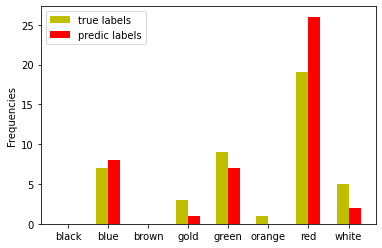

In [6]:
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

predic_labels = KNN(train_features, train_labels, test_features, 5, manhattan_distance, weighted=False)

colors = ['black','blue','brown','gold','green','orange','red','white']
color_inx = {'black':0, 'blue':1, 'brown':2, 'gold':3, 'green':4, 'orange':5, 'red':6, 'white':7}

test_count = Counter(test_labels)
predic_count = Counter(predic_labels)

test_list = [0 for _ in range(len(colors))]
predic_list = [0 for _ in range(len(colors))]

for key in test_count:
    test_list[color_inx[key]] = test_count[key]

for key in predic_count:
    predic_list[color_inx[key]] = predic_count[key]

bar_width = 0.3
index_test = np.arange(len(colors))
index_predic = index_test + bar_width

plt.bar(index_test, height=test_list, width=bar_width, color='y', label='true labels')
plt.bar(index_predic, height=predic_list, width=bar_width, color='r', label='predic labels')

plt.legend()
plt.xticks(index_test + bar_width/2, colors)
plt.xlabel('Colors')
plt.ylabel('Frequencies')

plt.show()
